**Ensemble Classifier**

Loading data

In [ ]:
import numpy as np
import pandas as pd
import glob
import random 

# image
from PIL import Image

# visu
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

Loading data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/680_Birds_Data/archive/train"
test_dir = "/content/drive/MyDrive/680_Birds_Data/archive/test"
val_dir = "/content/drive/MyDrive/680_Birds_Data/archive/valid"

In [ ]:

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = (224,224),
                                                                 batch_size = 32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224,224),
                                                                batch_size = 32)
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                               label_mode= "categorical",
                                                               image_size = (224,224),
                                                               batch_size = 32)

Found 45983 files belonging to 315 classes.
Found 1575 files belonging to 315 classes.
Found 1575 files belonging to 315 classes.


***Data Visulization***

In [ ]:
labels_names = train_data.class_names

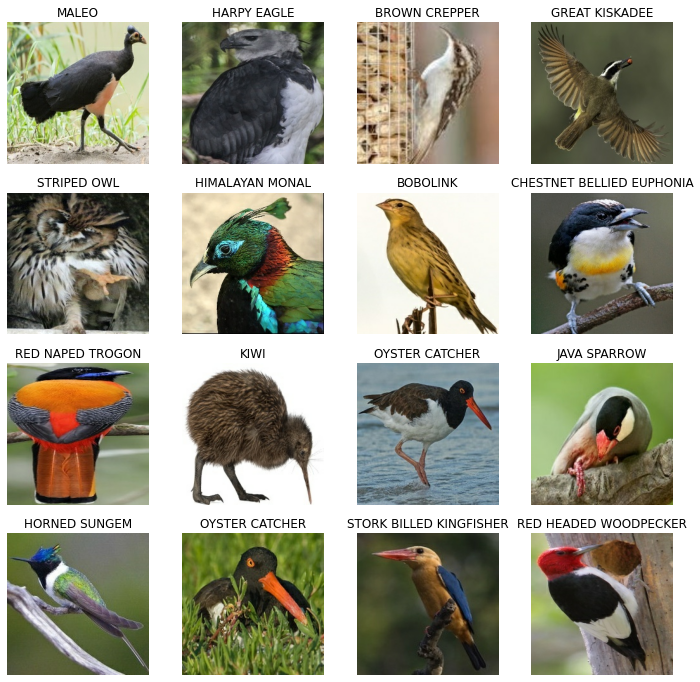

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(12,12))
for image, label in train_data.take(1):
  
  for i in range(16):
    
    plt.subplot(4,4, i+1)  
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels_names[tf.argmax(label[i])])
    plt.axis("off")

In [ ]:
train_dataset = train_data.map(lambda x, y: (tf.divide(x, 255), y))

In [ ]:
print(train_dataset)

<MapDataset shapes: ((None, 224, 224, 3), (None, 315)), types: (tf.float32, tf.float32)>


Defining the dataset to csv

In [ ]:
import os

In [ ]:
train_path = '/content/drive/MyDrive/680_Birds_Data/archive/train'
birds = np.array(list(os.listdir(train_path)))

In [ ]:
np.random.shuffle(birds)
birds = birds[:20]

In [ ]:
idx_to_name = {i:x for (i,x) in enumerate(birds)}
name_to_idx = {x:i for (i,x) in enumerate(birds)}
print(idx_to_name)

{0: 'ROYAL FLYCATCHER', 1: 'PURPLE FINCH', 2: 'BLACK & YELLOW bROADBILL', 3: 'KAKAPO', 4: 'RED BELLIED PITTA', 5: 'ELLIOTS  PHEASANT', 6: 'BORNEAN BRISTLEHEAD', 7: 'HYACINTH MACAW', 8: 'CLARKS NUTCRACKER', 9: 'WOOD DUCK', 10: 'IMPERIAL SHAQ', 11: 'VARIED THRUSH', 12: 'SATYR TRAGOPAN', 13: 'GRAY CATBIRD', 14: 'HOUSE SPARROW', 15: 'BALI STARLING', 16: 'RED HONEY CREEPER', 17: 'BLUE COAU', 18: 'MYNA', 19: 'GUINEA TURACO'}


In [ ]:
import cv2

In [ ]:
def get_data_labels(path, birds, dim):
    data = []
    labels = []

    for bird in birds:
        imgs = [cv2.resize(cv2.imread(img), dim, interpolation=cv2.INTER_AREA) for img in glob.glob(path + "/" + bird + "/*.jpg")]
        for img in imgs:
            data.append(img)
            labels.append(name_to_idx[bird])
    return np.array(data), np.array(labels)

In [ ]:
data_train, labels_train = get_data_labels('/content/drive/MyDrive/680_Birds_Data/archive/train', idx_to_name.values(), (224,224))

In [ ]:
data_valid, labels_valid = get_data_labels('/content/drive/MyDrive/680_Birds_Data/archive/valid', idx_to_name.values(), (224,224))

In [ ]:
data_test, labels_test = get_data_labels('/content/drive/MyDrive/680_Birds_Data/archive/test', idx_to_name.values(), (224,224))

In [ ]:
data_train.shape

(3009, 224, 224, 3)

Plot the image

(array([[463., 441., 472., ..., 124., 110., 141.],
        [456., 443., 473., ..., 128., 112., 139.],
        [451., 429., 483., ..., 132., 116., 134.],
        ...,
        [441., 445., 467., ..., 159., 108., 107.],
        [451., 433., 476., ..., 148., 112.,  99.],
        [436., 460., 433., ..., 168.,  99., 102.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 Lists of Patches objects>)

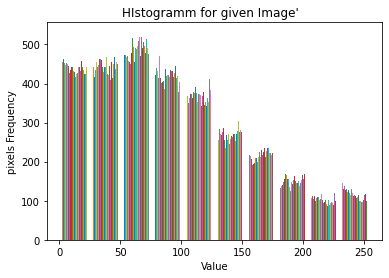

In [ ]:
x_train=data_train[:,:,0,0]
plt.title("HIstogramm for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency") #hist function is used to plot the histogram of an image.
plt.hist(x_train)

(array([[13., 17., 15., ...,  3.,  2.,  3.],
        [10., 20., 16., ...,  3.,  2.,  3.],
        [13., 17., 15., ...,  2.,  2.,  3.],
        ...,
        [11., 15., 19., ...,  6.,  3.,  1.],
        [11., 16., 19., ...,  6.,  4.,  1.],
        [11., 14., 26., ...,  6.,  7.,  1.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 Lists of Patches objects>)

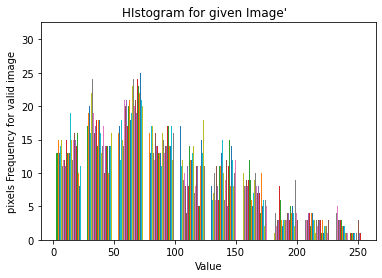

In [ ]:
x_valid=data_valid[:,:,0,0]
plt.title("HIstogram for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency for valid image") #hist function is used to plot the histogram of an image.
plt.hist(x_valid)


(array([[13., 13., 22., ...,  4.,  3.,  2.],
        [13., 12., 22., ...,  2.,  4.,  2.],
        [13., 13., 20., ...,  3.,  3.,  3.],
        ...,
        [22., 15.,  8., ...,  5.,  3.,  1.],
        [23., 15., 10., ...,  5.,  1.,  1.],
        [23., 17.,  6., ...,  7.,  1.,  1.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 Lists of Patches objects>)

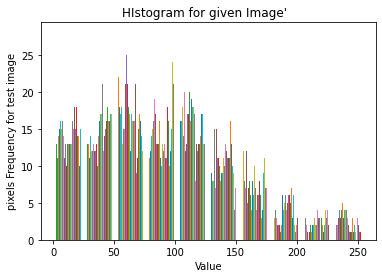

In [ ]:
x_test=data_test[:,:,0,0]
plt.title("HIstogram for given Image'  ")
plt.xlabel("Value")
plt.ylabel("pixels Frequency for test image") #hist function is used to plot the histogram of an image.
plt.hist(x_test)

In [ ]:
data_valid.shape

(100, 224, 224, 3)

In [ ]:
labels_valid.shape

(100,)

In [ ]:
def normalize(data):
    data = data / 255.0
    data = data.astype('float32')
    return data


In [ ]:
data_train = normalize(data_train)
data_test = normalize(data_test)
data_valid = normalize(data_valid)

In [ ]:
data_test.shape

(100, 224, 224, 3)

In [ ]:
from keras.utils import np_utils

One-hot labels 

In [ ]:
y_train = np_utils.to_categorical(labels_train,num_classes=20)

In [ ]:
y_valid = np_utils.to_categorical(labels_valid,num_classes=20)

In [ ]:
y_test = np_utils.to_categorical(labels_test,num_classes=20)

In [ ]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
train = data_train[:, :, :, 0]
valid = data_valid[:, :, :, 0]
test = data_test[:, :, :, 0]

In [ ]:
train.shape

(3009, 224, 224)

In [ ]:
data_test.shape[1:3]

(224, 224)

In [ ]:
data_test.shape[0]

100

In [ ]:
dim_data = np.prod(train.shape[1:])

In [ ]:
print(dim_data)

50176


In [ ]:
train_data = train.reshape(train.shape[0], dim_data)
valid_data = valid.reshape(valid.shape[0], dim_data)
test_data = test.reshape(test.shape[0], dim_data)

In [ ]:
valid_data

array([[0.29411766, 0.29803923, 0.27058825, ..., 0.25882354, 0.28627452,
        0.28235295],
       [0.24705882, 0.24705882, 0.24705882, ..., 0.4392157 , 0.43137255,
        0.42745098],
       [0.15686275, 0.17254902, 0.2       , ..., 0.22745098, 0.22352941,
        0.24313726],
       ...,
       [0.46666667, 0.69411767, 0.87058824, ..., 0.04705882, 0.05098039,
        0.05098039],
       [0.1882353 , 0.18431373, 0.18039216, ..., 0.03529412, 0.03137255,
        0.02745098],
       [0.05098039, 0.05098039, 0.05098039, ..., 0.76862746, 0.76862746,
        0.7647059 ]], dtype=float32)

Define two level-0 model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder


Test

In [ ]:
def get_models():
	models = dict()
	models['mlp'] = MLPClassifier(random_state=1, max_iter=300)
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models


In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, train_data, labels_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>mlp 0.076 (0.024)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>lr 0.197 (0.014)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>knn 0.165 (0.010)
>cart 0.154 (0.015)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

Now, we will choose the stacking method to combine these five model!

In [ ]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('mlp', MLPClassifier(random_state=1, max_iter=300)))
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
def get_models():
	models = dict()
	models['mlp'] = MLPClassifier(random_state=1, max_iter=300)
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models


In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

>mlp 0.053 (0.046)
>lr 0.147 (0.076)
>knn 0.167 (0.075)
>cart 0.107 (0.063)
>svm 0.057 (0.048)
>bayes 0.040 (0.049)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>stacking 0.123 (0.083)


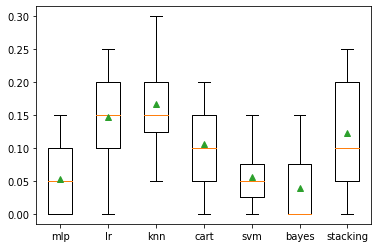

In [ ]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, test_data, labels_test)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()